# Rejection Sampling

https://angeloyeo.github.io/2020/09/16/rejection_sampling.html

In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def f(x):
    return 0.3*np.exp(-0.2*x**2) + 0.7*np.exp(-0.2*(x-10)**2)

In [206]:
domain = np.linspace(-10, 20, 100)
domain

array([-10.        ,  -9.6969697 ,  -9.39393939,  -9.09090909,
        -8.78787879,  -8.48484848,  -8.18181818,  -7.87878788,
        -7.57575758,  -7.27272727,  -6.96969697,  -6.66666667,
        -6.36363636,  -6.06060606,  -5.75757576,  -5.45454545,
        -5.15151515,  -4.84848485,  -4.54545455,  -4.24242424,
        -3.93939394,  -3.63636364,  -3.33333333,  -3.03030303,
        -2.72727273,  -2.42424242,  -2.12121212,  -1.81818182,
        -1.51515152,  -1.21212121,  -0.90909091,  -0.60606061,
        -0.3030303 ,   0.        ,   0.3030303 ,   0.60606061,
         0.90909091,   1.21212121,   1.51515152,   1.81818182,
         2.12121212,   2.42424242,   2.72727273,   3.03030303,
         3.33333333,   3.63636364,   3.93939394,   4.24242424,
         4.54545455,   4.84848485,   5.15151515,   5.45454545,
         5.75757576,   6.06060606,   6.36363636,   6.66666667,
         6.96969697,   7.27272727,   7.57575758,   7.87878788,
         8.18181818,   8.48484848,   8.78787879,   9.09

In [207]:
target = [f(x) for x in domain]
target

[6.183460867315673e-10,
 2.0402018964983243e-09,
 6.488773729790722e-09,
 1.989299008793585e-08,
 5.878756274154077e-08,
 1.6746297305715247e-07,
 4.598329542308541e-07,
 1.2171086243439554e-06,
 3.105321287627996e-06,
 7.637156568031157e-06,
 1.810526144786639e-05,
 4.137384280096865e-05,
 9.113703016796626e-05,
 0.00019351375384910394,
 0.0003960743843147313,
 0.0007814291841759681,
 0.0014861082695985183,
 0.002724326957291687,
 0.0048141094250842365,
 0.008200128165724145,
 0.013463974362157769,
 0.021309529680110125,
 0.032510406966569025,
 0.04781001725584981,
 0.06777403580490181,
 0.0926095444687336,
 0.1219820987026707,
 0.15487610115228587,
 0.18954863712748946,
 0.22361703155361626,
 0.25429454434611976,
 0.2787514664139495,
 0.29454064382931466,
 0.30000000144280753,
 0.294540648168269,
 0.2787514814357165,
 0.25429459073087307,
 0.22361716871616397,
 0.18954902787229982,
 0.15487717409532864,
 0.12198493862267297,
 0.09261679021837735,
 0.0677918558368878,
 0.0478522628658

In [208]:
max(target)

0.700000000618346

In [211]:
M = 0.71

def g(x):
    return M*x

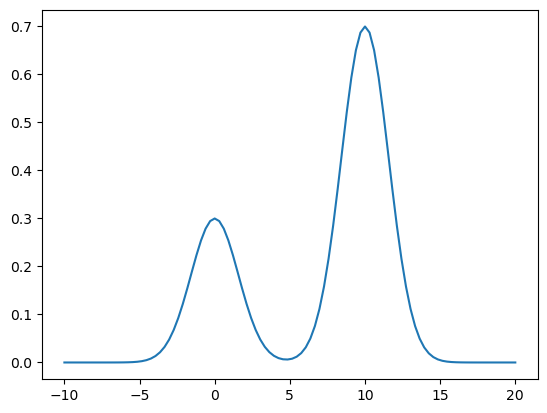

In [117]:
plt.plot(domain, target)
plt.show()

In [244]:
uniform_list = np.random.default_rng().uniform(-10, 20, 5000)

In [245]:
accept_list = []
accept_target = []
reject_list = []
reject_target = []

for num in uniform_list:
    new_n = np.random.default_rng().uniform(0, M)
    if new_n <= f(num):
        accept_list.append(num)
        accept_target.append(new_n)
    else:
        reject_list.append(num)
        reject_target.append(new_n)

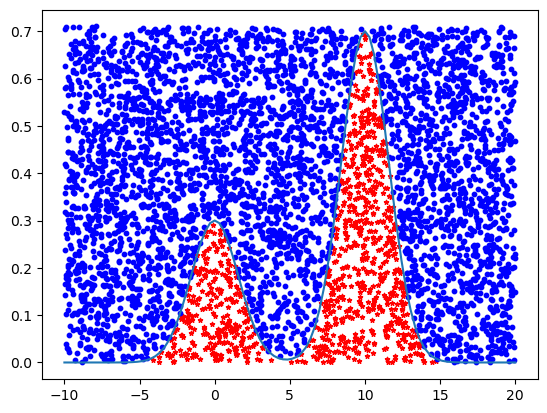

In [246]:
plt.plot(domain, target)

plt.scatter(accept_list, accept_target, c='red', marker='*', s=10)
plt.scatter(reject_list, reject_target, c='blue', s=10)

plt.show()

## 복습: Rejection Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 0.3*np.exp(-0.2*x**2) + 0.7*np.exp(-0.2*(x-10)**2)

In [3]:
domain = np.linspace(-10, 20, 100)
target = [f(x) for x in domain]

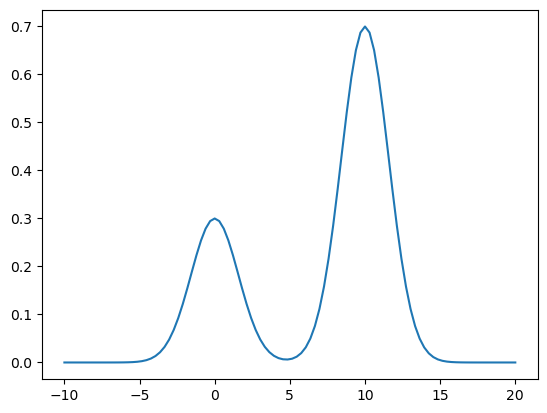

In [4]:
plt.plot(domain, target)
plt.show()

In [10]:
M = max(target) + 0.001
M

0.701000000618346

In [7]:
np.random.uniform(-10, 20, 2)

array([ 2.06348941, -3.05472529])

In [13]:
uniform_list = np.random.default_rng().uniform(-10, 20, 5000)

accept_list = []
accept_target = []
reject_list = []
reject_target = []

for num in uniform_list:
    new_n = np.random.uniform(0, M)
    if new_n <= f(num):
        accept_list.append(num)
        accept_target.append(new_n)
    else:
        reject_list.append(num)
        reject_target.append(new_n)

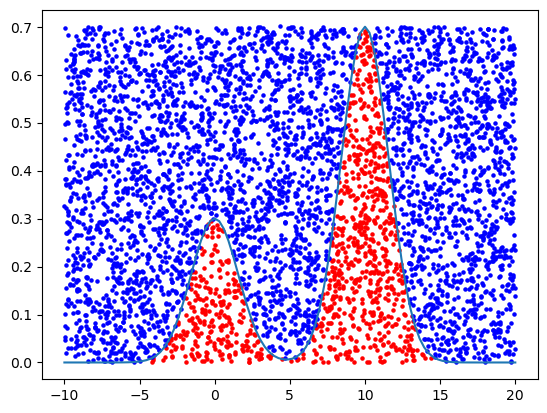

In [14]:
plt.plot(domain, target)
plt.scatter(accept_list, accept_target, c='red', s=5)
plt.scatter(reject_list, reject_target, c='blue', s=5)
plt.show()

# MCMC in Circle

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [28]:
total = 1000000
x_list = np.random.default_rng().uniform(-1, 1, total)
y_list = np.random.default_rng().uniform(-1, 1, total)
inner_circle_x = []
inner_circle_y = []
outer_circle_x = []
outer_circle_y = []

for x, y in zip(x_list, y_list):
    if x**2 + y**2 <=1:
        inner_circle_x.append(x)
        inner_circle_y.append(y)
    else:
        outer_circle_x.append(x)
        outer_circle_y.append(y)

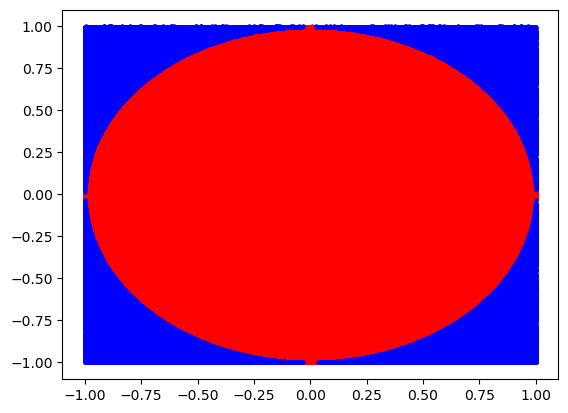

In [29]:
plt.scatter(inner_circle_x, inner_circle_y, c='red', s=5)
plt.scatter(outer_circle_x, outer_circle_y, c='blue', s=5)
plt.show()

In [31]:
total = 10000000
x_list = np.random.default_rng().uniform(-1, 1, total)
y_list = np.random.default_rng().uniform(-1, 1, total)
inner_circle_x = []
inner_circle_y = []
outer_circle_x = []
outer_circle_y = []

for x, y in zip(x_list, y_list):
    if x**2 + y**2 <=1:
        inner_circle_x.append(x)
        inner_circle_y.append(y)
    else:
        outer_circle_x.append(x)
        outer_circle_y.append(y)

print(len(inner_circle_x), len(inner_circle_y))
print(len(outer_circle_x), len(outer_circle_y))
print(len(inner_circle_x)*4/total)

7853472 7853472
2146528 2146528
3.1413888


In [36]:
total_list = [10, 100, 1000, 5000, 10000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
pi_list = []

for total in tqdm(total_list):
    x_list = np.random.default_rng().uniform(-1, 1, total)
    y_list = np.random.default_rng().uniform(-1, 1, total)
    inner_circle_x = []
    inner_circle_y = []
    outer_circle_x = []
    outer_circle_y = []

    for x, y in zip(x_list, y_list):
        if x**2 + y**2 <=1:
            inner_circle_x.append(x)
            inner_circle_y.append(y)
        else:
            outer_circle_x.append(x)
            outer_circle_y.append(y)
    
    pi_list.append(len(inner_circle_x)*4/total)

100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


In [37]:
pi_list

[3.6,
 3.12,
 3.12,
 3.1072,
 3.1636,
 3.14832,
 3.14752,
 3.13842,
 3.14336,
 3.14003,
 3.140496,
 3.1415333333333333,
 3.1410285714285715,
 3.140755,
 3.1401644444444443,
 3.14344,
 3.140872,
 3.1410453333333335,
 3.141937,
 3.1412416,
 3.1407066666666665,
 3.141469142857143,
 3.1413375,
 3.141278222222222,
 3.1407032]

In [41]:
np.array(pi_list) - np.array(np.pi)

array([ 4.58407346e-01, -2.15926536e-02, -2.15926536e-02, -3.43926536e-02,
        2.20073464e-02,  6.72734641e-03,  5.92734641e-03, -3.17265359e-03,
        1.76734641e-03, -1.56265359e-03, -1.09665359e-03, -5.93202565e-05,
       -5.64082161e-04, -8.37653590e-04, -1.42820915e-03,  1.84734641e-03,
       -7.20653590e-04, -5.47320256e-04,  3.44346410e-04, -3.51053590e-04,
       -8.85986923e-04, -1.23510733e-04, -2.55153590e-04, -3.14431368e-04,
       -8.89453590e-04])

In [42]:
42200*0.05

2110.0

In [1]:
35*36**4 + 35*36**3 + 35*36**2 + 35*36**1 + 35*36**0

60466175